# Eroded Otsu-labeling
Segments and labels an image using blurring, Otsu-thresholding, binary erosion and
masked Voronoi-labeling.

After bluring and Otsu-thresholding the image, iterative binary erosion is applied.
Objects in the eroded image are labeled and the labels are extended to fit again into
the initial binary image using masked-Voronoi labeling.

This function is similar to voronoi_otsu_labeling. It is intended to deal better in
case labels of objects swapping into each other if objects are dense. Like when using
Voronoi-Otsu-labeling, small objects may disappear when applying this operation.

This function is inspired by a similar [implementation in Java](https://github.com/biovoxxel/bv3dbox/blob/9e38ed02cff606e7e8fbe57db0f6af810bf1a83a/BioVoxxel_3D_Box/src/main/java/de/biovoxxel/bv3dbox/plugins/BV_LabelSplitter.java#L83) by Jan Brocher (Biovoxxel) in the [Biovoxxel toolbox](https://zenodo.org/badge/latestdoi/434949702). Big thanks Jan!

In [1]:
from skimage.data import cells3d
import pyclesperanto_prototype as cle

In [2]:
image = cells3d()
image.shape

(60, 2, 256, 256)

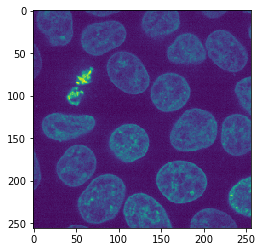

In [3]:
nuclei = image[30, 1]

cle.imshow(nuclei)

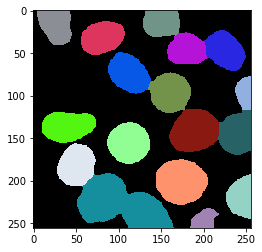

In [4]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=11, outline_sigma=4)

cle.imshow(labels, labels=True)

## Parameter: number_of_erosions
If the specified number of erosions is too small, sticky objects will be labeled together.

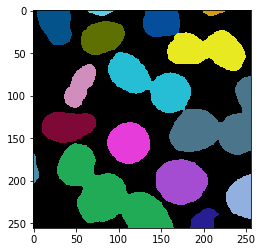

In [5]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=5, outline_sigma=4)

cle.imshow(labels, labels=True)

If too many erosions are configured, objects may disappear.

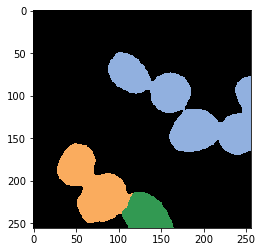

In [6]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=20, outline_sigma=4)

cle.imshow(labels, labels=True)

## Parameter: outline_sigma
With this outline, you can control the denoising before thresholding. If this value is too low, objects may have noisy edges and holes lead to more object-splits.

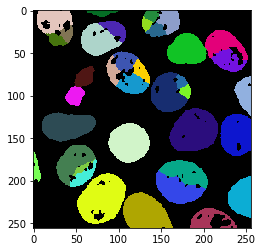

In [7]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=5, outline_sigma=1)

cle.imshow(labels, labels=True)

If this value is too high, object outlines may be not fitting to the original objects anymore.

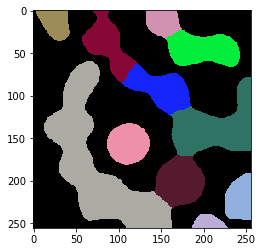

In [8]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=11, outline_sigma=10)

cle.imshow(labels, labels=True)

## Similar algorithm: Voronoi-Otsu-Labeling
Voronoi-Otsu-Labeling is a similar algorithm. When you see labels swapping over in neighbor-objects when using it like shown below, you may want to give object-splitting-Otsu-labeling a try.

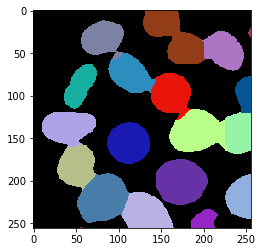

In [9]:
labels = cle.voronoi_otsu_labeling(nuclei, spot_sigma=10, outline_sigma=5)

cle.imshow(labels, labels=True)

## Documentation

In [10]:
cle.eroded_otsu_labeling?

Signature:
cle.eroded_otsu_labeling(
    image: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage],
    labels_destination: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage] = None,
    number_of_erosions: int = 5,
    outline_sigma: float = 2,
) -> Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage]
Docstring:
Segments and labels an image using blurring, Otsu-thresholding, binary erosion and
masked Voronoi-labeling.

After bluring and Otsu-thresholding the image, iterative binary erosion is applied.
Objects in the eroded image are labeled and the labels are extended to fit again into
the initial binary image using masked-Voronoi labeling.

This function is similar to voronoi_otsu_labeling. It is intended to deal better in
case labels 